In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
from hazma.scalar_mediator import ScalarMediator, HiggsPortal, HeavyQuark
from hazma.vector_mediator import VectorMediator, KineticMixing, QuarksOnly

# from hazma.parameters import neutral_pion_mass as mpi0
# from hazma.gamma_ray_parameters import (energy_res_fermi, energy_res_e_astrogam,
#                                         A_eff_e_astrogam, A_eff_comptel,
#                                         egret_diffuse, fermi_diffuse,
#                                         comptel_diffuse, gc_target,
#                                         gc_bg_model, solid_angle)
# from hazma.cmb import vx_cmb
# from utilities import latex_text_width_1col

colors = [c["color"] for c in list(plt.rcParams["axes.prop_cycle"])]
constraint_names = ["COMPTEL", "EGRET", "Fermi", "e-ASTROGAM", "CMB"]

In [7]:
sm.vs

0

In [70]:
from hazma.scalar_mediator import ScalarMediator
from hazma.parameters import charged_pion_mass as mpi
from hazma.parameters import pion_mass_chiral_limit as mPI
from hazma.parameters import neutral_pion_mass as mpi0
from hazma.parameters import vh

sm = ScalarMediator(mx=180., ms=500., gsxx=1., gsff=0.1, gsGG=0.1, gsFF=0.0, lam=vh)
e_cm = 2 * sm.mx * (1 + 0.5 * 9e-1**2)
    
gsGGs = np.linspace(-0.4 * sm.gsff, -0.2 * sm.gsff, 500)
bfs_pipi = []
bfs_mumu = []

for gsGG in gsGGs:
    sm.gsGG = gsGG
    bfs = sm.annihilation_branching_fractions(e_cm)
    bfs_pipi.append(bfs["pi0 pi0"])
    bfs_mumu.append(bfs["mu mu"])

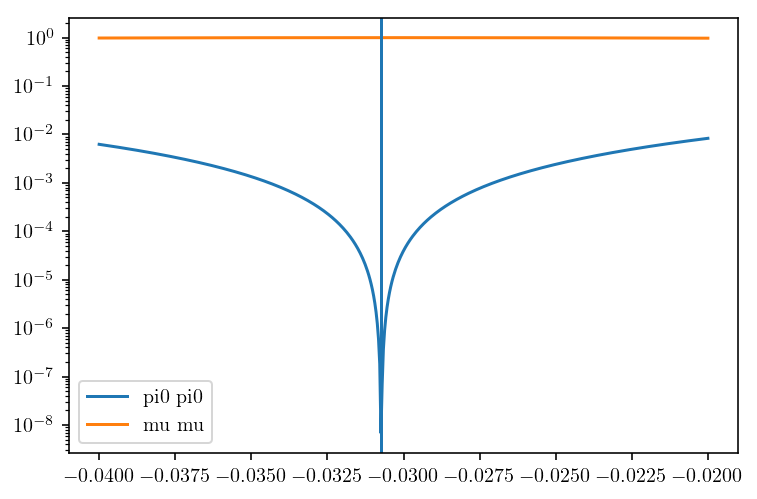

In [71]:
plt.plot(gsGGs, bfs_pipi, label="pi0 pi0")
plt.plot(gsGGs, bfs_mumu, label="mu mu")
plt.yscale("log")
plt.legend()

plt.axvline(-9 * sm.gsff * mPI**2 / (2 * (3*mPI**2 - 2 * mpi0**2 + e_cm**2)))

In [2]:
from hazma.scalar_mediator import ScalarMediator

sm = ScalarMediator(mx=150., ms=1e4, gsxx=1., gsff=0.1, gsGG=0, gsFF=0, lam=1e5)


from hazma.gamma_ray_parameters import A_eff_e_astrogam
from hazma.gamma_ray_parameters import energy_res_e_astrogam
from hazma.gamma_ray_parameters import T_obs_e_astrogam
from hazma.gamma_ray_parameters import gc_target, gc_bg_model
print(gc_target)
sm.unbinned_limit(A_eff_e_astrogam,       # effective area
                  energy_res_e_astrogam,  # energy resolution
                  T_obs_e_astrogam,       # observing time
                  gc_target,              # target region
                  gc_bg_model)            # background model
# 1.5595509943440295e-29

TargetParams(J=1.795e+29, dOmega=0.12122929761504078)


1.5595509943440295e-29

In [3]:
from hazma.scalar_mediator import ScalarMediator
from hazma.gamma_ray_parameters import egret_diffuse
sm = ScalarMediator(mx=150., ms=1e4, gsxx=1., gsff=0.1, gsGG=0.5, gsFF=0, lam=1e5)
sm.binned_limit(egret_diffuse)
# 7.84178468e-27

7.841784676562726e-27

In [2]:
from hazma.scalar_mediator import HeavyQuark
sm = HeavyQuark(mx=140., ms=1e3, gsxx=1., gsQ=0.1, mQ=1e3, QQ=0.1)
sm.gamma_ray_lines(e_cm=300.)

{'g g': {'energy': 150.0, 'bf': 1.285653242415087e-08}}

In [3]:
from hazma.vector_mediator import QuarksOnly
vm = QuarksOnly(mx=140., mv=1e3, gvxx=1., gvuu=0.1, gvdd=0.1, gvss=0.)
vm.gamma_ray_lines(e_cm=300.)
# {'pi0 g': {'energy': 119.6, 'bf': 1.0}}

{'pi0 g': {'energy': 119.63552908740002, 'bf': 1.0}}

In [5]:
from hazma.cmb import p_ann_planck_temp_pol as p_ann
x_kd = 1e-4
sm = HiggsPortal(mx=150., ms=1e4, gsxx=1., stheta=0.01)
sm.cmb_limit(x_kd, p_ann)
# 1.220976099164218e-28

/Users/acoogan/Dropbox/Physics/Sub-GeV_DM/Hazma/hazma/positron_spectra.py:57: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  return positron_charged_pion.Spectrum(eng_p, eng_pi)


1.220976099170212e-28

In [6]:
sm.f_eff(x_kd), sm.f_eff_ep(x_kd), sm.f_eff_g(x_kd)
# (0.42998384682287843, 0.17643491366430347, 0.25354893315857496)

(0.42998384682287843, 0.17643491366430347, 0.25354893315857496)

In [19]:
gc_target

TargetParams(J=1.795e+29, dOmega=0.12122929761504078)

In [50]:
from hazma.gamma_ray_parameters import TargetParams
tp = TargetParams(J=1e29, dOmega=0.1)
print(tp)

TargetParams(J=1e+29, dOmega=0.1)


In [ ]:
TargetParams(J=1e29, dOmega=0.1)

In [51]:
from hazma.background_model import BackgroundModel
bg = BackgroundModel([0.5, 1e4], lambda e: 2.7e-3 / e**2)

In [53]:
bg = BackgroundModel.from_file("bg_data.csv")

In [54]:
bg.dPhi_dEdOmega(100)

array(0.28404084)

In [ ]:
array([1.31717165e-28, 1.55955099e-29, 5.06324800e-29])

In [32]:
mx, vx = 200., 1e-3
e_cm = 2 * mx * (1 + 0.5 * vx**2)
sm.annihilation_cross_sections(e_cm)["total"]

5.658244468191e-36

In [19]:
from hazma.gamma_ray_parameters import egret_diffuse

sthetas = np.array([0.01, 0.1, 0.5])
lims = []

for stheta in sthetas:
    hp = HiggsPortal(mx=1., ms=1e4, gsxx=1., stheta=stheta)
    mxs = np.array([100., 150., 200.])
    lims.append(hp.binned_limits(mxs, egret_diffuse))

lims = np.array(lims)

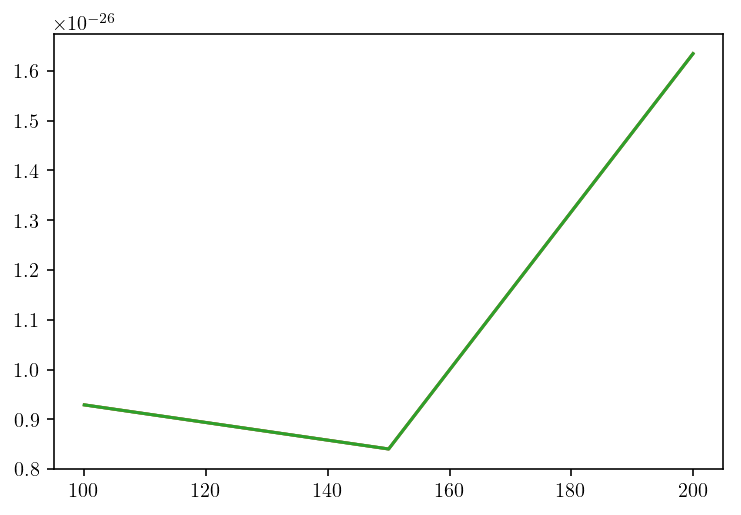

In [20]:
for ls, stheta in zip(lims, sthetas):
    plt.plot(mxs, ls, label="stheta={}".format(stheta))

In [22]:
lims

array([[9.28973415e-27, 8.40342641e-27, 1.63461160e-26],
       [9.28973415e-27, 8.40342641e-27, 1.63461160e-26],
       [9.28973415e-27, 8.40342641e-27, 1.63461160e-26]])

In [12]:
from hazma.positron_spectra import muon as dnde_p_mu
e_mu = 150.                       # muon energy
e_ps = np.array([1., 10., 100.])  # positron energies
dnde_p_mu(e_ps, e_mu)

array([5.10574626e-05, 4.56382870e-03, 4.45777255e-03])

In [13]:
from hazma.positron_spectra import charged_pion as dnde_p_pi
e_pi = 150.                       # charged pion energy
e_ps = np.array([1., 10., 100.])  # positron energies
dnde_p_pi(e_ps, e_pi)

array([3.91369707e-05, 3.85286042e-03, 2.54571969e-05])

In [15]:
from hazma.scalar_mediator import HiggsPortal
e_cm = 305.                       # DM center of mass energy
e_ps = np.array([1., 10., 100.])  # positron energies
hp = HiggsPortal(mx=150., ms=1e3, gsxx=0.7, stheta=0.1)
hp.dnde_pos_pipi(e_ps, e_cm)

array([3.98665983e-05, 3.89921630e-03, 1.72946085e-04])

In [16]:
hp.dnde_pos_mumu(e_ps, e_cm)

array([5.20149620e-05, 4.61376485e-03, 4.68018858e-03])

In [17]:
hp.positron_lines(e_cm)

{'e e': {'energy': 152.5, 'bf': 4.109750194098895e-06}}

In [18]:
hp.positron_spectra(e_ps, e_cm)

{'total': array([2.67213393e-05, 2.58231940e-03, 4.09388783e-04]),
 'mu mu': array([3.42678327e-06, 3.03958161e-04, 3.08334204e-04]),
 'pi pi': array([2.32945560e-05, 2.27836124e-03, 1.01054578e-04])}

In [24]:
e_cm = 305.                  # DM center of mass energy
e_p_min, e_p_max = 1., 100.  # define energy range
energy_res = lambda e: 0.05  # 5% energy resolution function
dnde_p_conv = hp.total_conv_positron_spectrum_fn(
    e_p_min, e_p_max, e_cm, energy_res)
dnde_p_conv(20.)

array(0.00833621)

In [23]:
dnde_p_conv.integral(10, 100)

0.6369696795046674

In [29]:
from hazma.scalar_mediator import HiggsPortal
e_cm = 305.                  # DM center of mass energy
e_min, e_max = 1., 100.      # define energy range
energy_res = lambda e: 0.05  # 5% energy resolution function
hp = HiggsPortal(mx=150., ms=1e3, gsxx=0.7, stheta=0.1)
dnde_conv = hp.total_conv_spectrum_fn(
    e_min, e_max, e_cm, energy_res, n_pts=1000)

In [31]:
dnde_conv(25.)

array(0.00048767)

In [32]:
dnde_conv.integral(25., 85.)

0.8691133833417997